In [242]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras import layers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

import numpy as np
import matplotlib.pyplot as plt

In [243]:
# Keras의 Random Seed 설정은 np.random.seed( )를 통해 해줄 수 있다.
# 재현성 잡힌 Image Load & Augmentation 결과를 얻고 싶다면 np.random.seed( )를 설정

# 즉 datagen을 이용해서 이미지를 증식하는 방법을 사용하기 때문에
# 실행할때 마다 결과가 조금씩 다를 수 있다. 해당 결과를 실행마다 같게하기위해서 시드 설정
np.random.seed(15)

In [244]:
from keras.preprocessing.image import ImageDataGenerator

#  이미지 4장을 한 번에 읽어들이기 위해 batch_size = 4으로 설정
batch_size = 4
iterations = 5

# 생성시에 파라미터를 설정하면 어떻게 augmentation를 진행할지 지정할 수 있다.
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2)

generator = datagen.flow_from_directory(
    'C:\\vsCode\\PillProject\\imageT\\color\\test', 
    target_size=(256,256), 
    batch_size=batch_size, 
    class_mode = 'categorical')

Found 106 images belonging to 5 classes.


In [245]:
imgs, labels = [], []
for i in enumerate(range(iterations)):
    a, b = generator.next()
    imgs.extend(a)
    labels.extend(b)
    
test_images = np.asarray(imgs, dtype=np.uint8)
labels = np.asarray(labels, dtype=np.uint8)

test_labels = []
for i in labels:
    rank = 0
    for ii in i:
        if(ii == 1):
            break
        rank += 1
    list1 = []
    list1.append(rank)
    test_labels.extend(list1)
labels = np.asarray(test_labels, dtype=np.uint8)
test_labels = labels[:, np.newaxis]

In [246]:
from keras.preprocessing.image import ImageDataGenerator

#  이미지 4장을 한 번에 읽어들이기 위해 batch_size = 4으로 설정
batch_size = 4
iterations = 5

# 생성시에 파라미터를 설정하면 어떻게 augmentation를 진행할지 지정할 수 있다.
datagen = ImageDataGenerator(
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2)

generator = datagen.flow_from_directory(
    'C:\\vsCode\\PillProject\\imageT\\color\\train', 
    target_size=(256,256), 
    batch_size=batch_size, 
    class_mode = 'categorical')

Found 810 images belonging to 5 classes.


In [248]:
imgs, labels = [], []
for i in enumerate(range(iterations)):
    a, b = generator.next()
    imgs.extend(a)
    labels.extend(b)
    
train_images = np.asarray(imgs, dtype=np.uint8)
labels = np.asarray(labels, dtype=np.uint8)

train_labels = []
for i in labels:
    rank = 0
    for ii in i:
        if(ii == 1):
            break
        rank += 1
    list1 = []
    list1.append(rank)
    train_labels.extend(list1)
labels = np.asarray(train_labels, dtype=np.uint8)
train_labels = labels[:, np.newaxis]

In [249]:
test_images

array([[[[191, 206, 225],
         [191, 206, 225],
         [191, 206, 225],
         ...,
         [165, 180, 199],
         [177, 192, 211],
         [191, 206, 225]],

        [[191, 206, 225],
         [191, 206, 225],
         [191, 206, 225],
         ...,
         [165, 180, 199],
         [176, 191, 210],
         [191, 206, 225]],

        [[191, 206, 225],
         [191, 206, 225],
         [191, 206, 225],
         ...,
         [165, 180, 199],
         [176, 191, 210],
         [191, 206, 225]],

        ...,

        [[191, 206, 227],
         [191, 206, 227],
         [191, 206, 227],
         ...,
         [182, 197, 216],
         [185, 200, 219],
         [186, 201, 220]],

        [[191, 206, 227],
         [191, 206, 227],
         [191, 206, 227],
         ...,
         [183, 198, 217],
         [185, 200, 219],
         [186, 201, 220]],

        [[191, 206, 227],
         [191, 206, 227],
         [191, 206, 227],
         ...,
         [183, 198, 217],
        

In [250]:
test_labels

array([[0],
       [4],
       [2],
       [3],
       [0],
       [4],
       [1],
       [4],
       [4],
       [1],
       [4],
       [4],
       [1],
       [2],
       [3],
       [1],
       [0],
       [1],
       [0],
       [4]], dtype=uint8)

In [251]:
train_images

array([[[[190, 206, 224],
         [190, 206, 225],
         [190, 206, 226],
         ...,
         [191, 206, 225],
         [191, 206, 225],
         [191, 206, 225]],

        [[191, 206, 225],
         [191, 206, 225],
         [191, 206, 226],
         ...,
         [191, 206, 225],
         [191, 206, 225],
         [191, 206, 225]],

        [[192, 206, 225],
         [192, 206, 225],
         [192, 206, 225],
         ...,
         [191, 206, 225],
         [191, 206, 225],
         [191, 206, 225]],

        ...,

        [[190, 205, 224],
         [190, 205, 223],
         [190, 206, 222],
         ...,
         [191, 206, 225],
         [191, 206, 225],
         [191, 206, 225]],

        [[190, 205, 224],
         [190, 205, 223],
         [190, 206, 222],
         ...,
         [191, 206, 225],
         [191, 206, 225],
         [191, 206, 225]],

        [[190, 205, 224],
         [190, 205, 223],
         [190, 206, 222],
         ...,
         [191, 206, 225],
        

In [252]:
train_labels

array([[2],
       [1],
       [1],
       [4],
       [2],
       [1],
       [0],
       [4],
       [3],
       [2],
       [0],
       [1],
       [1],
       [3],
       [0],
       [1],
       [1],
       [3],
       [1],
       [1]], dtype=uint8)

In [253]:
# cifar_mnist = datasets.cifar10
# (train_images, train_labels), (test_images, test_labels) = cifar_mnist.load_data()

In [254]:
# train_images

In [255]:
# train_labels

IndexError: index 20 is out of bounds for axis 0 with size 20

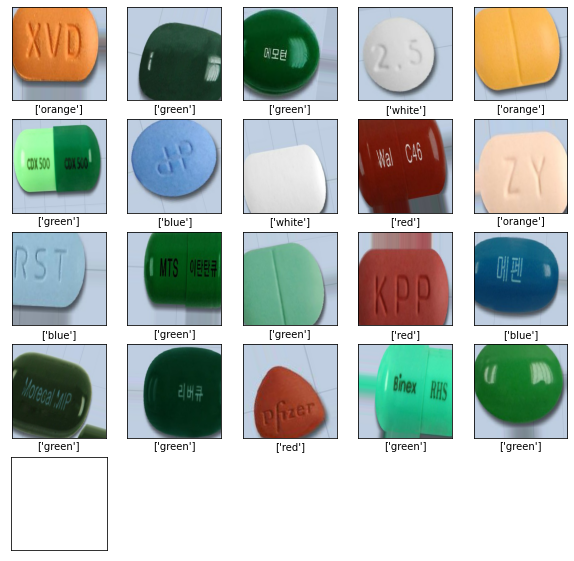

In [256]:
class_names = ['blue', 'green', 'orange', 'red', 'white']
class_names = np.array(class_names)
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [191]:
batch_size = 64
num_classes = 5
epochs = 50

train_images = train_images.astype('float32')
train_images = train_images/255

test_images = test_images.astype('float32')
test_images = test_images/255

train_labels = utils.to_categorical(train_labels, num_classes)
test_labels = utils.to_categorical(test_labels, num_classes)


In [192]:
model = keras.Sequential([
    Conv2D(32, kernel_size = (3,3), padding = 'same', input_shape = train_images.shape[1:],
          activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Conv2D(64, kernel_size = (3,3), padding = 'same', activation=tf.nn.relu),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    
    Flatten(),
    Dense(64, activation=tf.nn.relu),
    Dropout(0.25),
    Dense(num_classes, activation=tf.nn.softmax)
])

In [193]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics=['accuracy']
)

In [194]:
early_stopping=EarlyStopping(monitor='val_loss', patience=5)

history = model.fit(
    train_images, train_labels,
    epochs=epochs,
    validation_data=(test_images, test_labels),
    shuffle=True,
    callbacks=[early_stopping]
)

Epoch 1/50
26/26 [==============================] - 3s 104ms/step - loss: 5.8521 - accuracy: 0.4529 - val_loss: 0.8726 - val_accuracy: 0.6538
Epoch 2/50
26/26 [==============================] - 2s 82ms/step - loss: 0.4152 - accuracy: 0.8189 - val_loss: 0.5289 - val_accuracy: 0.7981
Epoch 3/50
26/26 [==============================] - 2s 82ms/step - loss: 0.2671 - accuracy: 0.8983 - val_loss: 0.5763 - val_accuracy: 0.7212
Epoch 4/50
26/26 [==============================] - 2s 82ms/step - loss: 0.1890 - accuracy: 0.9479 - val_loss: 0.7757 - val_accuracy: 0.6635
Epoch 5/50
26/26 [==============================] - 2s 82ms/step - loss: 0.4016 - accuracy: 0.8573 - val_loss: 0.4621 - val_accuracy: 0.8750
Epoch 6/50
26/26 [==============================] - 2s 83ms/step - loss: 0.2364 - accuracy: 0.9280 - val_loss: 0.9056 - val_accuracy: 0.6731
Epoch 7/50
26/26 [==============================] - 2s 82ms/step - loss: 0.1145 - accuracy: 0.9677 - val_loss: 0.8789 - val_accuracy: 0.6827
Epoch 8/50
2

In [195]:
loss, acc = model.evaluate(test_images, test_labels)
print('\nLoss : {}, Acc : {}'.format(loss,acc))

4/4 [==============================] - 0s 53ms/step - loss: 0.7771 - accuracy: 0.8654

Loss : 0.7770828008651733, Acc : 0.8653846383094788


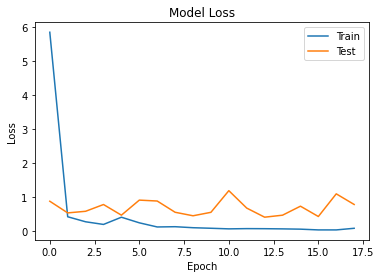

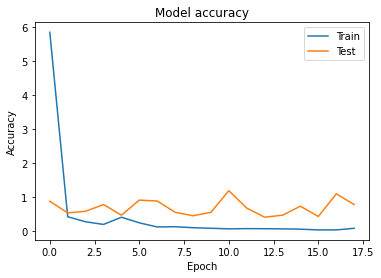

In [196]:
def plot_show_loss(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
    
def plot_show_acc(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc=0)
    
plot_show_loss(history)
plt.show()

plot_show_acc(history)
plt.show()

In [197]:
# 예측
predictions = model.predict(test_images)

4/4 [==============================] - 0s 19ms/step


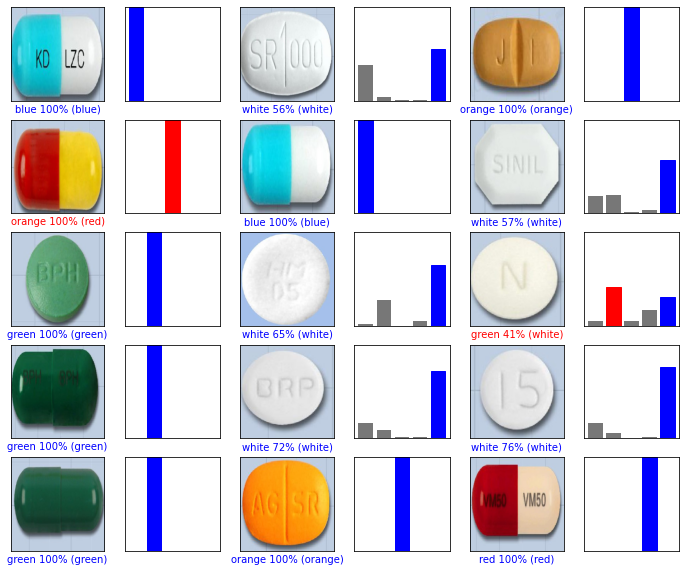

In [198]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == np.argmax(true_label):
        color = 'blue'
    else:
        color = 'red'
    
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[np.argmax(true_label)]),
                                        color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(5), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[np.argmax(true_label)].set_color('blue')

    
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions, test_labels)
plt.show()